In [3]:
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
import random as rd
import statistics as st

In [4]:
# def get_edge_list(file_name):
#     with open(file_name) as ifs:
#         lines = ifs.readlines()
#         edge_list = map(lambda line: map(int, line.strip().split()), filter(lambda ele: '#' not in ele, lines))
#     return edge_list

def get_edge_list(file_name):
    # Open the file and read its contents
    with open(file_name) as file:
        lines = file.readlines()

    # Remove lines that are comments (start with "#")
    lines = [line for line in lines if '#' not in line]

    # Convert each line to a pair of integers
    edge_list = []
    for line in lines:
        edge = tuple(map(int, line.strip().split()))
        edge_list.append(edge)
    
    return edge_list

def get_undirected_graph_info(file_name):
    my_edge_list = get_edge_list(file_name)
    undirected_graph = nx.Graph()
    undirected_graph.add_edges_from(my_edge_list)
    file_info = file_name.split(os.sep)[-1].split('_')[0]
    str_list = [file_info, 'nodes num:' + str(undirected_graph.number_of_nodes()), 'edges num:'
                + str(undirected_graph.number_of_edges())]
    print (' | '.join(str_list))


def get_dir_info(dir_name):
    my_walk = os.walk(dir_name)
    my_root, sub_root_list, file_list = list(my_walk)[0]
    path_list = map(lambda ele: my_root + os.sep + ele, file_list)
    for my_path in path_list:
        get_undirected_graph_info(my_path)


In [5]:
get_undirected_graph_info('test.txt')

test.txt | nodes num:9 | edges num:14


In [6]:
edgeList = get_edge_list('test.txt')

In [7]:
print(edgeList)

[(1, 2), (1, 3), (1, 5), (2, 1), (2, 4), (2, 3), (3, 2), (3, 4), (3, 1), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7), (5, 1), (5, 4), (6, 4), (6, 7), (6, 8), (6, 9), (7, 4), (7, 6), (7, 8), (8, 7), (8, 6), (8, 9)]


In [8]:
undirected_graph = nx.Graph()
undirected_graph.add_edges_from(edgeList)

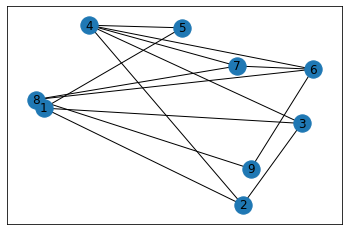

In [9]:

nx.draw_networkx(undirected_graph,pos=nx.random_layout(undirected_graph))

In [10]:
rd.choice (list(undirected_graph.edges(1)))
undirected_graph.edges((1,2))


EdgeDataView([(1, 2), (1, 3), (1, 5), (2, 4), (2, 3)])

In [11]:
graphEdge = undirected_graph.edges()
graphNode = undirected_graph.nodes()

In [12]:
number_of_edges=len(graphEdge)

In [13]:
initialGene= np.full(number_of_edges, -1)

In [14]:
locus = [i for i in range(1,number_of_edges+1)]
locus

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [15]:
len(initialGene)

14

In [16]:
labledEdge = {t: i+1 for i, t in enumerate(graphEdge)}
labledEdge

{(1, 2): 1,
 (1, 3): 2,
 (1, 5): 3,
 (2, 4): 4,
 (2, 3): 5,
 (3, 4): 6,
 (5, 4): 7,
 (4, 6): 8,
 (4, 7): 9,
 (6, 7): 10,
 (6, 8): 11,
 (6, 9): 12,
 (7, 8): 13,
 (8, 9): 14}

In [17]:
def getEdgeLabel(labledEdge,edge):
    try:
      return labledEdge[edge]
    except:
      try:
        return labledEdge[(edge[1],edge[0])]
      except:
        print('NO KEY FOUND')
    

In [18]:
def getEdgeValue(labledEdge,value):
   return next((k for k, v in labledEdge.items() if v == value), None)

getEdgeValue(labledEdge,5)

(2, 3)

In [19]:
#make initial communities
prevNode : tuple 
gene = []
for  edge,l in labledEdge.items():
    connectedEdges = list(undirected_graph.edges(edge))
    geneValue = getEdgeLabel(labledEdge,rd.choice(connectedEdges))


    if(geneValue != None):
        gene.append(geneValue)

print(locus)
print(gene)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[5, 1, 2, 6, 2, 9, 9, 8, 10, 13, 10, 12, 13, 14]


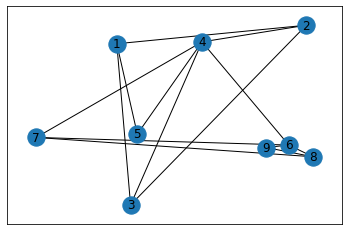

In [20]:
nx.draw_networkx(undirected_graph,pos=nx.random_layout(undirected_graph))

In [21]:

print(locus)
print(gene)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[5, 1, 2, 6, 2, 9, 9, 8, 10, 13, 10, 12, 13, 14]


In [90]:
#finished but not tested with real gene
def calculateFitness(communities: list,labledEdge):
    D = 0
    E = len(labledEdge)
    for i in communities:
        community = nx.Graph()
        community.add_edges_from([getEdgeValue(labledEdge, j) for j in i])
        mc = community.number_of_edges()
        nc = community.number_of_nodes()
        # print(nc)
        if nc>=3:
            D += mc * ((mc - (nc-1)) / (((nc-2)*(nc-1))))
            # print(D)

    return 2*D/E

calculateFitness([[1,2,7],[7,8,9]],labledEdge)

-0.03571428571428571

In [23]:
print(type({1,2}))


<class 'set'>


In [24]:
def makeCommunities(locus,gene):
    communityList=[]
    edge1 = locus[0]
    edge2 = gene[0]
    for i in range(1,len(locus)):
        pass

        
        
    

In [25]:
def most_frequent(List):
    return max(set(List), key = List.count)

most_frequent([1,1,2,2,3,3,3])

3

In [26]:
def getNodeLabel():
    pass

In [27]:
def setNodeLabel():
    pass

In [28]:
def has_repetitions(lst):
    return len(set(lst)) < len(lst)

has_repetitions([1,1,2,2])

True

In [29]:
from collections import defaultdict



def createCommunities(x:dict):
    groups = defaultdict(list)

    # Group the keys based on the values
    for key, value in x.items():
        groups[value].append(key)

    # Get the list of lists with the keys
    y = list(groups.values())

    return y

x = {1: 2, 2: 2, 3: 2, 4: 8, 5: 1, 6: 8, 7: 8, 8: 8, 9: 8}
createCommunities(x)

[[1, 2, 3], [4, 6, 7, 8, 9], [5]]

In [36]:
def labelProp(undirected_graph):
    
    graphNode = undirected_graph.nodes()
    asList = sorted(list(graphNode))
    randomizedList = asList[:]
    rd.shuffle(randomizedList)
    # print(randomizedList)
    labledNodes = {i+1:t  for i, t in enumerate(asList)}
    prevLabledNodes = labledNodes
    # print(labledNodes)
    stop = False
    while not stop:
        for v in randomizedList:
            # v = rd.choice(asList)
            # v = 5
            neighbors = [i for i in nx.all_neighbors(undirected_graph,v)]
            labledNeighbors = [labledNodes[i] for i in nx.all_neighbors(undirected_graph,v)]
            # print(neighbors)
            
            if(has_repetitions(labledNeighbors)):
                freq = most_frequent(labledNeighbors)
                labledNodes[v] = freq
            else:
                freq = rd.choice(labledNeighbors)
                labledNodes[v] = freq
            
            # print(labledNodes)

            if(prevLabledNodes == labledNodes):
                stop = True
    return labledNodes

labelProp(undirected_graph)

{1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 7, 7: 7, 8: 7, 9: 7}

In [95]:

for i in range(7):
    lp = labelProp(undirected_graph)
    cmnti = createCommunities(lp)
    # print(cmnti)
    fit = calculateFitness(cmnti,labledEdge)
    print(f'fitness : {fit} | CommunityList : {cmnti}')
    
    

fitness : 0.0 | CommunityList : [[1, 2, 3], [4, 5], [6, 7, 8, 9]]
fitness : 0.0 | CommunityList : [[1, 2, 3, 4], [5], [6, 7, 8, 9]]
fitness : 0.05952380952380952 | CommunityList : [[1, 2, 3, 4, 5], [6], [7, 8], [9]]
fitness : -0.03571428571428571 | CommunityList : [[1, 5], [2, 3, 4], [6, 7, 8, 9]]
fitness : 0.0 | CommunityList : [[1], [2, 3, 4, 5], [6], [7], [8, 9]]
fitness : 0.0 | CommunityList : [[1, 5], [2, 3], [4, 6, 7, 8, 9]]
fitness : 0.25 | CommunityList : [[1, 2, 3, 4, 5, 6, 7], [8], [9]]


In [31]:
undirected_graph.neighbors(1)
iter(undirected_graph[2])

In [32]:
graphNode = undirected_graph.nodes()
sorted(list(graphNode))
    

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [33]:
a = {1:'a',2:'b'}
b=a
b = {1:'a',2:'d'}
a
b

{1: 'a', 2: 'd'}

In [34]:
# def most_common(List):
#     return(st.mode(List))
   
# List = [2, 1, 2, 2, 1, 3]
# print(most_common(List))

In [35]:
list({1,2,3}) == [1,2,3]

True